# Explanation of the project

🎯 Proje: 🚗 Araç Yakıt Tüketimi Tahmini (MPG Prediction)
Problem:

Bir aracın teknik özelliklerine göre yakıt tüketimini (mpg) tahmin edeceğiz.

Bu:

Gerçek dünya problemi

Regression

Feature engineering var

Çok karışık değil

Seaborn’daki mpg dataset’i aslında 1970–1980 arası arabaların teknik özelliklerini içerir ve yakıt verimliliğini (mpg) analiz etmek için kullanılır.

🚗 mpg Dataset – Kolonlar ve Açıklamaları
1️⃣ mpg

Miles Per Gallon

1 galon yakıtla kaç mil gidiyor.

Hedef değişken (genelde tahmin ettiğimiz şey).

Yüksek olması = daha az yakıt tüketimi.

2️⃣ cylinders

Silindir sayısı

Motorun kaç silindirli olduğu.

Genelde: 4, 6, 8

Daha fazla silindir → genelde daha fazla güç → daha fazla tüketim.

3️⃣ displacement

Motor hacmi (cubic inches)

Motorun büyüklüğü.

Büyük motor → genelde daha fazla yakıt tüketir.

4️⃣ horsepower

Beygir gücü

Motorun ürettiği güç.

Yüksek horsepower → genelde daha düşük mpg.

5️⃣ weight

Araç ağırlığı (pound cinsinden)

Daha ağır araç → daha fazla yakıt tüketir.

mpg ile güçlü negatif ilişki vardır.

6️⃣ acceleration

0’dan 60 mph’ye hızlanma süresi (saniye)

Aracın hızlanma performansı.

İlginç şekilde mpg ile ters veya zayıf ilişkisi olabilir.

7️⃣ model_year

Model yılı (70 = 1970)

70–82 arası değerler.

Yıllar ilerledikçe motor teknolojisi geliştiği için mpg genelde artar.

8️⃣ origin

Aracın üretim bölgesi

1 = USA

2 = Europe

3 = Japan

Genelde Japon ve Avrupa araçları daha verimlidir.

9️⃣ name

Araç modeli (string)

Örn: "ford pinto"

ML’de genelde kullanılmaz (çok kategorili, high cardinality).

# EDA

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns

import missingno as msno
import matplotlib.pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [6]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
df.shape

(398, 9)

<Axes: >

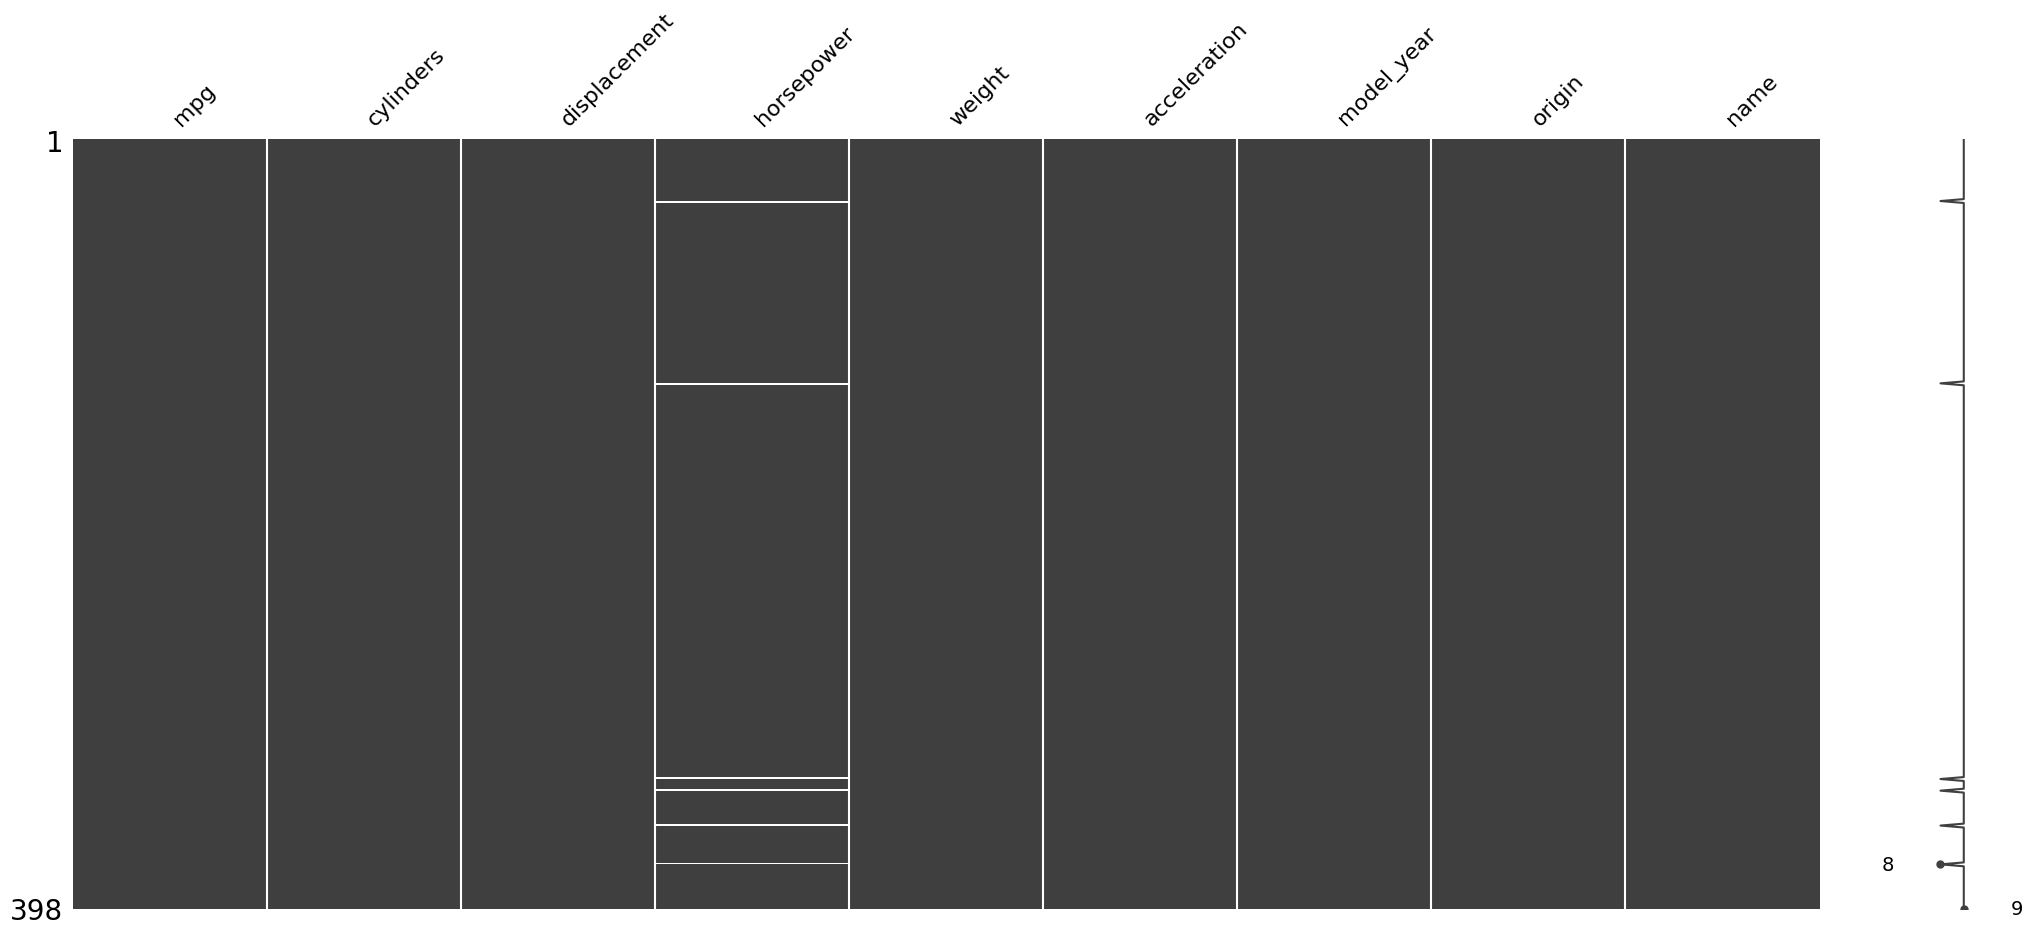

In [9]:
msno.matrix(df)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(392, 9)

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [13]:
df['cylinders'].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [14]:
df['acceleration'].value_counts()

acceleration
14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
20.4     1
17.1     1
15.6     1
24.6     1
11.6     1
Name: count, Length: 95, dtype: int64

In [15]:
df['mpg'].value_counts()

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
28.1     1
24.2     1
30.7     1
22.4     1
44.0     1
Name: count, Length: 127, dtype: int64

<Axes: >

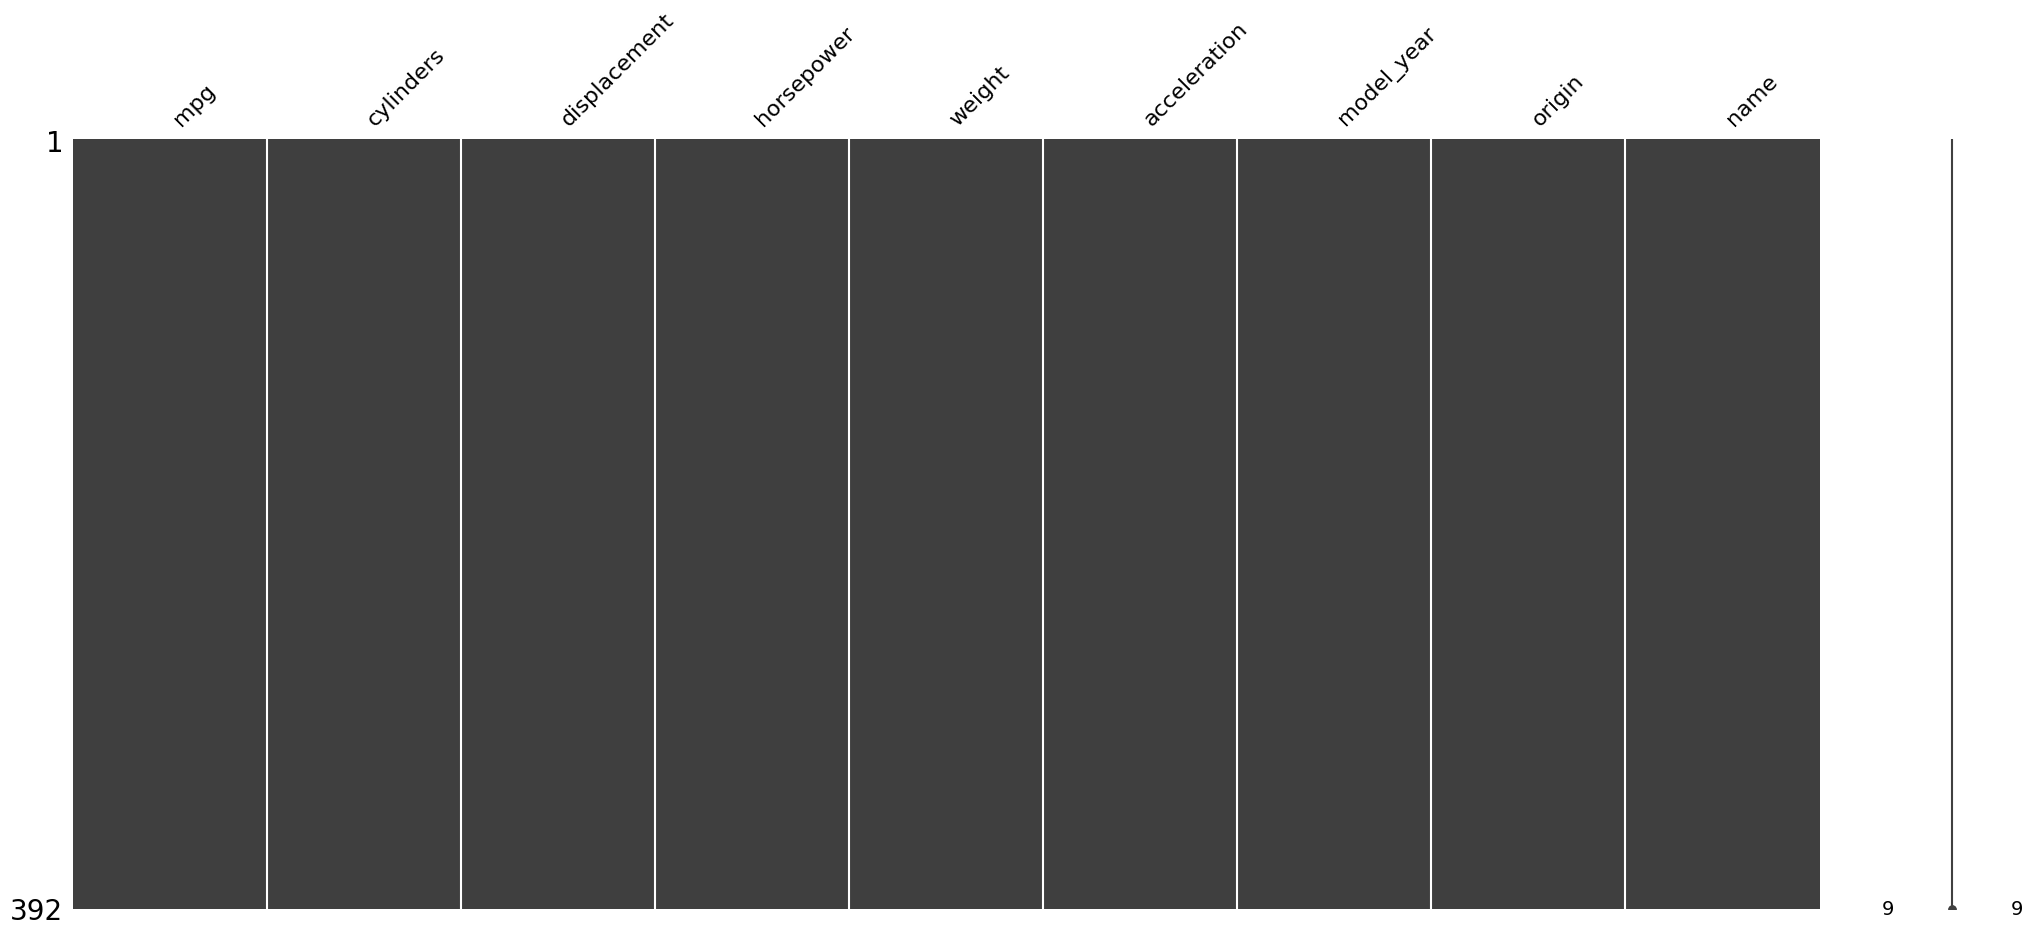

In [16]:
msno.matrix(df)

In [17]:
df.duplicated().sum()

np.int64(0)

# DV

## BARPLOT

In [18]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
323,27.9,4,156.0,105.0,2800,14.4,80,usa,dodge colt


C:\Users\missena\AppData\Local\Temp\ipykernel_9864\810346596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df.origin, y = df.mpg ,palette='viridis')


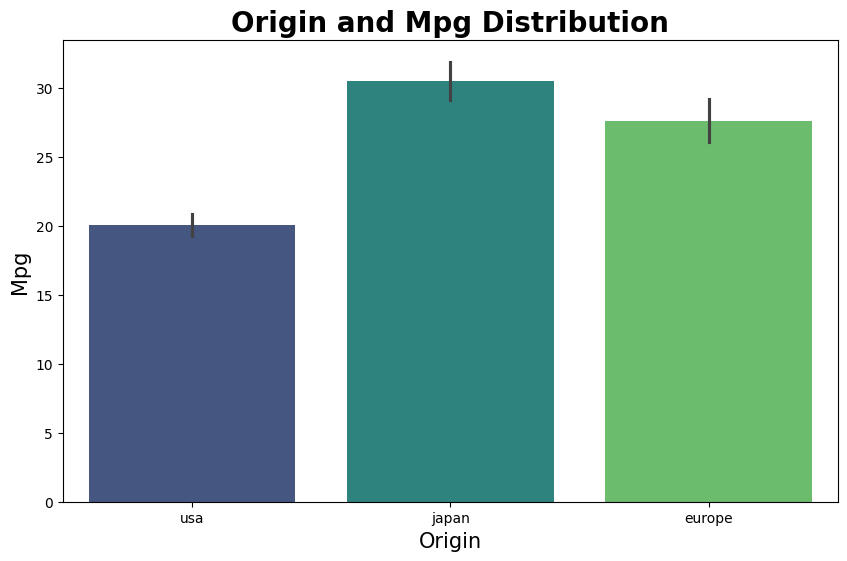

In [19]:
plt.figure(figsize= (10,6))
ax = sns.barplot(x = df.origin, y = df.mpg ,palette='viridis')
# ax.set(xlabel = 'origin',ylabel = 'mpg')
ax.set_xlabel('Origin', fontsize = 15)
ax.set_ylabel('Mpg', fontsize = 15)

ax.set_title('Origin and Mpg Distribution', fontsize= 20, fontweight = 'bold')
plt.show()


## HEATMAP

In [20]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
382,34.0,4,108.0,70.0,2245,16.9,82,japan,toyota corolla


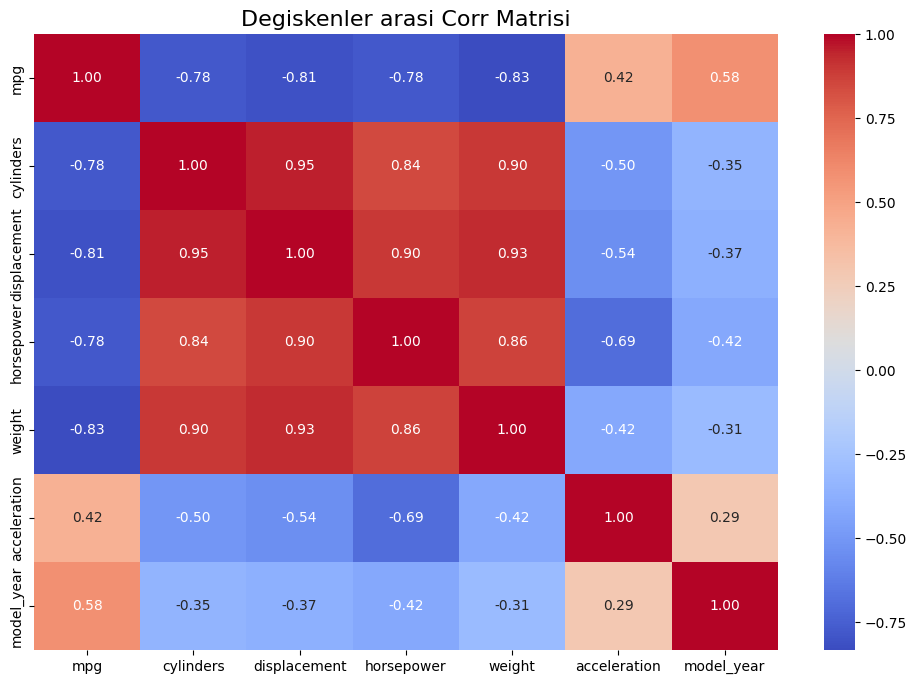

In [21]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Degiskenler arasi Corr Matrisi', fontsize = 16)
plt.show()

Bu Korelasyon Isı Haritası (Heatmap), ilk başta baktığımız karmaşık scatter plot (nokta) grafiğinin sayısal bir özetidir. Keşifçi Veri Analizi (EDA) için en kritik tablolardan biridir.

İşte bu tablodaki rakamların bize fısıldadığı en önemli bilgiler:

1. MPG (Yakıt Verimliliği) Üzerindeki Etkiler
mpg satırına baktığımızda, aracın verimliliğini neyin düşürdüğünü net bir şekilde görüyoruz:

En Büyük Düşmanlar: weight (-0.83), displacement (-0.81), cylinders (-0.78) ve horsepower (-0.78).

Yorum: Bu değerlerin -1.0'a bu kadar yakın olması, çok güçlü bir negatif ilişkiyi gösterir. Yani araç ağırlaştıkça ve motor büyüdükçe yakıt ekonomisi "kaçınılmaz olarak" çakılıyor.

Model Yılı Etkisi (0.58): Pozitif bir korelasyon var. Bu da yıllar ilerledikçe üretilen araçların daha verimli hale geldiğini kanıtlıyor.

2. "Güç Grubu" Arasındaki Muazzam Bağ
Tablonun orta kısmındaki koyu kırmızı blok (0.90 ve üzeri değerler) çok dikkat çekici:

Displacement vs. Cylinders (0.95): Neredeyse mükemmel bir doğru. Silindir sayısı arttıkça motor hacmi de aynı oranda artıyor.

Weight vs. Displacement (0.93): Büyük motorlu araçların neredeyse tamamı çok ağır.

Yorum: Bu değişkenler arasında Çoklu Doğrusallık (Multicollinearity) var. Eğer bir makine öğrenmesi modeli kuracaksan, bu dört değişkenden sadece birini veya ikisini seçmek modelin sağlığı için daha iyi olabilir; çünkü hepsi aslında aynı şeyi (aracın cüssesini) temsil ediyor.

3. Acceleration (Hızlanma) Şaşırtmacası
acceleration ile horsepower arasındaki ilişki -0.69.

Neden Negatif? Çünkü bu veri setindeki acceleration değeri muhtemelen "0'dan 100'e çıkış süresini" temsil ediyor. Beygir gücü (horsepower) arttıkça, bu süre azalıyor. Yani sayı küçüldükçe araç aslında daha hızlı hızlanıyor.

## SCATTERPLOT

<Axes: xlabel='mpg', ylabel='cylinders'>

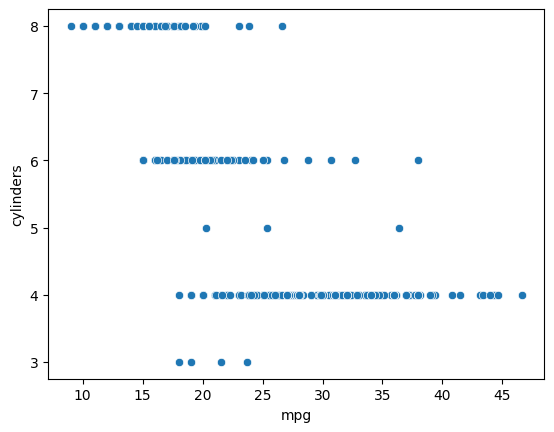

In [22]:
sns.scatterplot(data = df, x = 'mpg', y = 'cylinders')

<Axes: xlabel='mpg', ylabel='horsepower'>

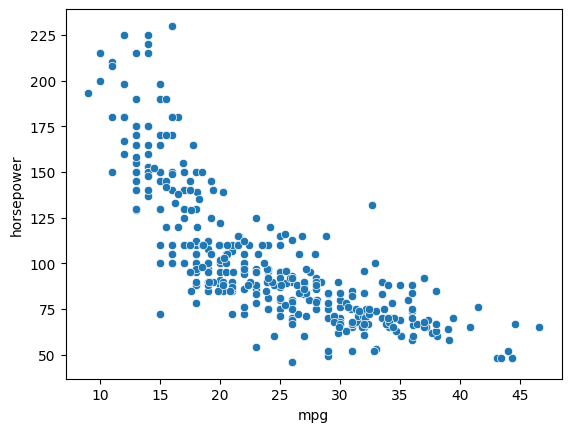

In [23]:
sns.scatterplot(data = df, x = 'mpg', y = 'horsepower')

## PAIRPLOT

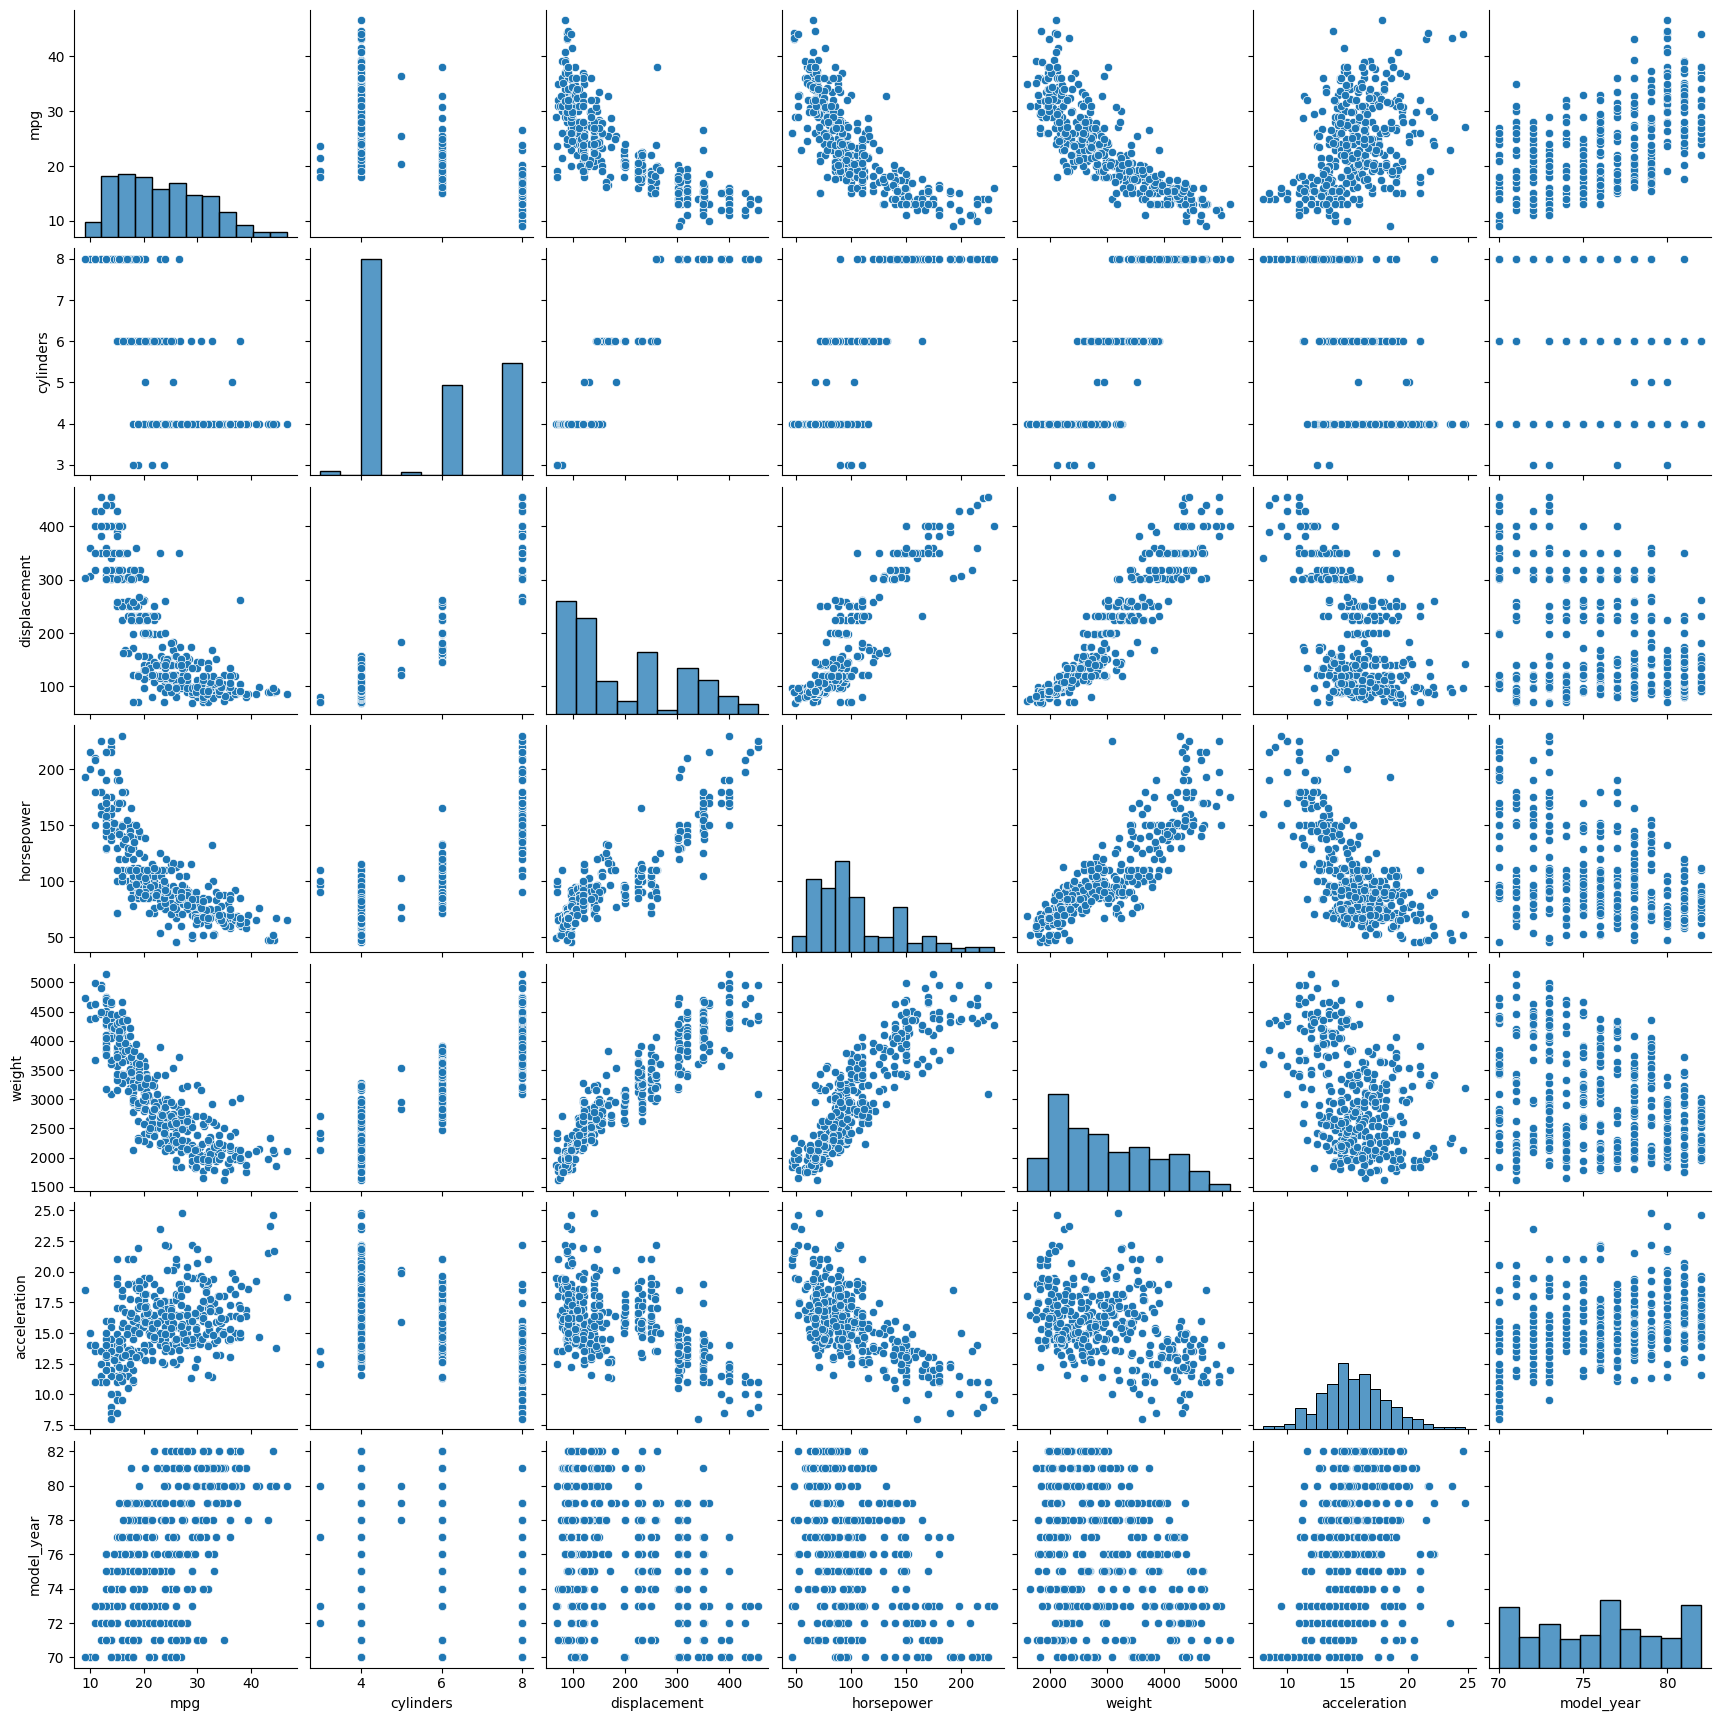

In [24]:
sns.pairplot(df)

1. Güçlü Pozitif İlişkiler (Doğrusal Artış)
Grafikteki bazı noktalar sol alt köşeden sağ üst köşeye doğru düz bir hat oluşturuyor. Bu, iki değişkenin beraber arttığını gösterir:

Weight vs. Displacement: Beklendiği gibi, motor hacmi (displacement) arttıkça aracın ağırlığı (weight) da neredeyse doğrusal bir şekilde artıyor.

Horsepower vs. Weight/Displacement: Beygir gücü arttıkça aracın hem ağırlığı hem de motor hacmi artış gösteriyor. Bu üç değişken birbirine sıkı sıkıya bağlı.

2. Güçlü Negatif İlişkiler (Ters Orantı)
Grafikteki en belirgin eğilimler mpg (yakıt verimliliği) satırında/sütununda görülüyor:

MPG vs. Weight/Horsepower/Displacement: Burada net bir "aşağı doğru kavis" (negatif korelasyon) var. Yani araç ağırlaştıkça, beygir gücü arttıkça veya motor hacmi büyüdükçe yakıt verimliliği (mpg) hızla düşüyor.

Bu ilişki doğrusal değil, daha çok logaritmik/üstel bir azalma eğiliminde.

3. Zayıf veya Karmaşık İlişkiler
Acceleration (Hızlanma): Hızlanma ile diğer değişkenler arasındaki ilişki daha dağınık. Ancak genel olarak ağırlık ve beygir gücü arttıkça, 0-100 hızlanma süresinin (saniye cinsinden) azaldığı görülebiliyor.

Model Year: Yıllar geçtikçe (x ekseninde sağa gittikçe), mpg değerlerinde hafif bir yukarı doğru trend gözlemleniyor. Bu da otomobil teknolojisinin zamanla daha yakıt verimli hale geldiğini kanıtlıyor.

4. Köşegenler (Diagonal): Dağılımlar
Grafiğin sol üstten sağ alta uzanan çaprazındaki histogramlar, her bir değişkenin kendi içindeki yayılımını gösterir:

Cylinders: Kesikli sütunlar şeklinde görünüyor çünkü silindir sayısı (4, 6, 8 gibi) kategorik benzeri bir tamsayıdır.

MPG: Verilerin çoğunun düşük ve orta mpg değerlerinde yoğunlaştığını, çok yüksek verimliliğe sahip araç sayısının az olduğunu görebiliyoruz.

Özetle Ne Diyor?
Bu grafik bize şunu söylüyor: "Eğer hızlı ve güçlü (yüksek HP) bir araba istiyorsan, o araba muhtemelen ağır olacak ve çok yakıt tüketecektir (düşük MPG)."

## BOXPLOT

In [25]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
211,16.5,6,168.0,120.0,3820,16.7,76,europe,mercedes-benz 280s


C:\Users\missena\AppData\Local\Temp\ipykernel_9864\3872791226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'mpg',x = 'origin', data = df, palette='tab10')


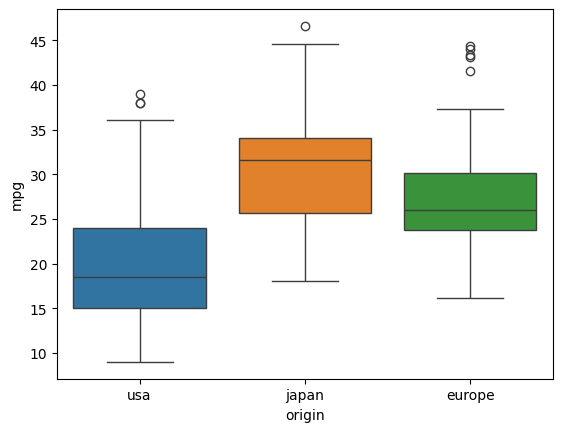

In [26]:
sns.boxplot(y = 'mpg',x = 'origin', data = df, palette='tab10')
plt.show()

1. Bölgesel Performans Karşılaştırması
Japonya (Japan): Veri setindeki en yüksek yakıt verimliliğine sahip bölge burasıdır. Kutu (medyan çizgisi) diğerlerine göre çok daha yukarıda konumlanmıştır. Japon araçlarının çoğu yaklaşık 25-35 mpg aralığında kümelenmiştir.

Avrupa (Europe): Japonya'dan hemen sonra gelir. Medyan değeri Japonya'dan düşük olsa da ABD'den belirgin şekilde yüksektir.

ABD (USA): En düşük yakıt verimliliğine sahip bölgedir. Kutunun büyük bir kısmı 15-25 mpg bandındadır. Bu, ABD menşeli araçların o dönemde daha büyük motorlu ve ağır (yakıt tüketen) araçlar olduğunu doğrular.

2. Değişkenlik ve Yayılım (Kutuların Boyu)
Kutuların dikey uzunlukları (Interquartile Range - IQR), o bölgedeki araçların ne kadar "standart" olduğunu gösterir.

ABD grafiğinde "bıyıklar" (whiskers) oldukça uzundur. Bu, ABD'de hem çok az yakan hem de çok fazla yakan geniş bir yelpazede araç üretildiğini anlatır.

Japonya ve Avrupa'nın kutuları daha yukarıda ve nispeten daha topludur; yani verimlilik konusunda belli bir standart yakalamışlardır.

3. Aykırı Değerler (Üstteki Noktalar)
Her üç bölgenin de üzerinde küçük daireler (outliers) görüyoruz.

Bu noktalar, o bölgenin genel üretim standardının çok üzerinde yakıt tasarrufu sağlayan "özel" modelleri temsil eder. Örneğin, ABD kısmındaki üst noktalar, muhtemelen o dönem çıkan nadir ekonomik modelleri simgeliyor.

Özet Çıkarım
Eğer bu veri setiyle bir makine öğrenmesi modeli kuracaksan:

origin değişkeni, mpg değerini tahmin etmek için çok güçlü bir belirleyicidir.

"Araba Japonya menşelidir" bilgisi, modelin yüksek bir mpg tahmin etmesi için yeterli bir sinyaldir.

C:\Users\missena\AppData\Local\Temp\ipykernel_9864\2185618444.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'mpg',x = 'horsepower', data = df, palette='tab10')


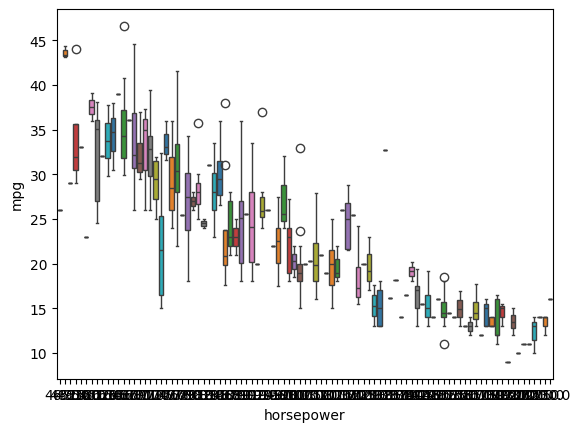

In [27]:
sns.boxplot(y = 'mpg',x = 'horsepower', data = df, palette='tab10')
plt.show()

## BUBLE CHART

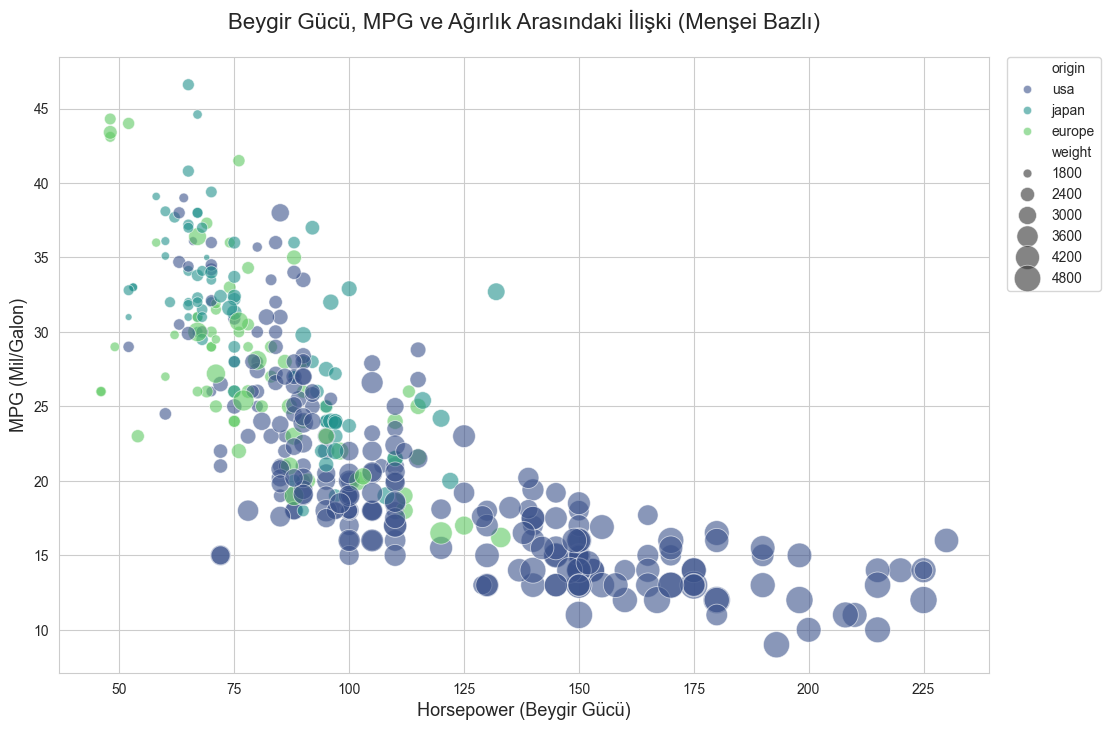

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Grafik boyutunu ve temasını ayarlayalım
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 2. Scatterplot fonksiyonu ile 4 boyutu eşleyelim
# x: Horsepower, y: MPG
# hue: Renk (Origin), size: Balon büyüklüğü (Weight)
ax = sns.scatterplot(data=df, 
                     x='horsepower', 
                     y='mpg', 
                     hue='origin', 
                     size='weight', 
                     sizes=(20, 400), # Balonların min ve max büyüklüğünü belirler
                     alpha=0.6,       # Balonları biraz şeffaf yapar (üst üste binmeleri görmek için)
                     palette='viridis')

# 3. Başlık ve etiketleri özelleştirelim
ax.set_title('Beygir Gücü, MPG ve Ağırlık Arasındaki İlişki (Menşei Bazlı)', fontsize=16, pad=20)
ax.set_xlabel('Horsepower (Beygir Gücü)', fontsize=13)
ax.set_ylabel('MPG (Mil/Galon)', fontsize=13)

# 4. Legend (Gösterge) kutusunu grafiğin dışına taşıyalım ki tabloyu kapatmasın
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

Paylaştığın bu Kabarcık Grafiği (Bubble Chart), mpg veri setindeki en karmaşık ve anlamlı ilişkileri tek bir karede özetliyor. Bu grafik; Beygir Gücü (Horsepower), Yakıt Verimliliği (MPG), Araç Ağırlığı (Weight) ve Menşei (Origin) olmak üzere 4 farklı boyutu aynı anda analiz etmemizi sağlıyor.

İşte bu görselin bize anlattığı ana hikayeler:

1. Temel İlişki: Güç vs. Verimlilik
Grafikteki genel eğilim sol üstten sağ alta doğru inen bir kavis çiziyor.

Ters Orantı: Beygir gücü (x ekseni) arttıkça, MPG (y ekseni) hızla düşüyor. Bu, yüksek performanslı araçların yakıt ekonomisinden ödün verdiğinin en net kanıtıdır.

2. Üçüncü Boyut: Ağırlık (Kabarcık Büyüklüğü)
Kabarcıkların büyüklüğü aracın ağırlığını (weight) temsil ediyor.

Sağ Alt Köşe: Buradaki balonlar hem en büyük (en ağır araçlar) hem de en düşük MPG değerine sahip. Yani yüksek beygir gücü, beraberinde büyük bir gövde ve ağırlık getiriyor.

Sol Üst Köşe: Buradaki balonlar en küçük (en hafif araçlar). Hafif araçların düşük beygir gücüyle bile çok yüksek yakıt verimliliğine ulaştığını görebiliyoruz.

3. Dördüncü Boyut: Bölgesel Farklar (Renkler)
Renkler araçların hangi bölgeden (USA, Japan, Europe) geldiğini gösteriyor:

USA (Mor/Koyu Renkler): Balonların çoğu sağ alt tarafta toplanmış. Yani ABD menşeli araçlar genellikle daha ağır, daha güçlü ve daha çok yakıt tüketen araçlardır.

Japan (Turkuaz/Mavi): Balonlar genellikle sol üstte yoğunlaşmış. Japon araçlarının stratejisinin hafiflik ve yüksek yakıt tasarrufu üzerine kurulu olduğu açıkça görülüyor.

Europe (Yeşil): Japonya ile benzer şekilde verimlilik odaklıdır ancak Japon araçlarına göre biraz daha geniş bir yelpazeye (orta seviye HP ve MPG) yayılmış durumdadır.

4. İstisnalar ve Aykırı Değerler
Grafiğin tam ortasında (yaklaşık 125-150 HP civarında) tek başına duran büyük bir turkuaz (Japonya) balonu gibi noktalar ilgi çekicidir. Bunlar, genel trendin dışında kalan, hem güçlü olup hem de nispeten daha iyi yakıt verimliliği sunan veya tam tersi durumdaki özel modelleri temsil eder.

Özet Çıkarım
Bu grafik bize şunu söylüyor: "Yakıt tasarrufu (MPG) istiyorsan Japonya/Avrupa'dan hafif bir araç seçmelisin; ancak güç (HP) istiyorsan ABD menşeli, ağır bir aracı göze almalısın."

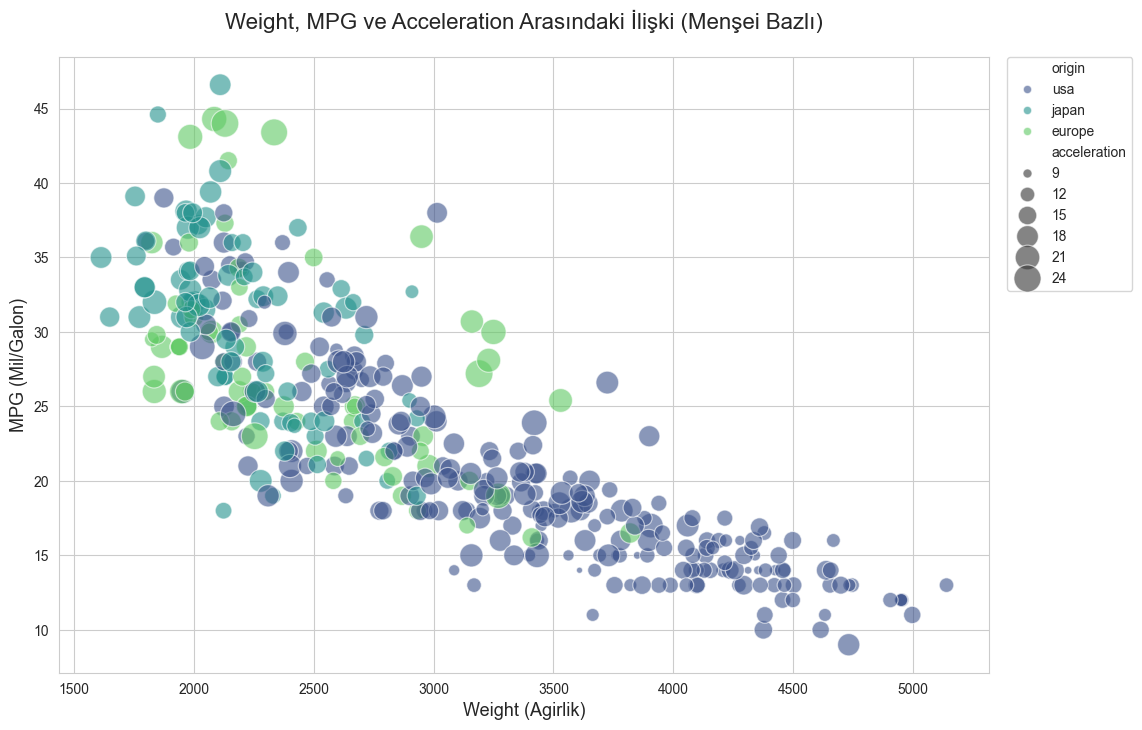

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Grafik boyutunu ve temasını ayarlayalım
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 2. Scatterplot fonksiyonu ile 4 boyutu eşleyelim
# x: Horsepower, y: MPG
# hue: Renk (Origin), size: Balon büyüklüğü (Weight)
ax = sns.scatterplot(data=df, 
                     x='weight', 
                     y='mpg', 
                     hue='origin', 
                     size='acceleration', 
                     sizes=(20, 400), # Balonların min ve max büyüklüğünü belirler
                     alpha=0.6,       # Balonları biraz şeffaf yapar (üst üste binmeleri görmek için)
                     palette='viridis')

# 3. Başlık ve etiketleri özelleştirelim
ax.set_title('Weight, MPG ve Acceleration Arasındaki İlişki (Menşei Bazlı)', fontsize=16, pad=20)
ax.set_xlabel('Weight (Agirlik)', fontsize=13)
ax.set_ylabel('MPG (Mil/Galon)', fontsize=13)

# 4. Legend (Gösterge) kutusunu grafiğin dışına taşıyalım ki tabloyu kapatmasın
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

# Encoding

In [29]:
df_encoded = pd.get_dummies(df, columns=['origin'],drop_first = True)


Artık 'origin' sütunu gitti, yerine 'origin_japan' ve 'origin_usa' geldi.

drop_first=True, kukla değişken tuzağından (dummy variable trap) kaçınmak içindir.

In [30]:
df_encoded.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_japan,origin_usa
62,13.0,8,350.0,165.0,4274,12.0,72,chevrolet impala,False,True


In [31]:
df_encoded.drop(['name'],axis=1, inplace=True)

# MODEL

In [32]:
X = df_encoded.drop('mpg', axis = 1)
y = df_encoded['mpg']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
print('R2:', model.score(X_test, y_test))

R2: 0.7922774714022588


# MODEL 2 

In [35]:
X2 = df[["horsepower", "weight", "acceleration"]]
y2 = df["mpg"]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [37]:
print('R2:', model2.score(X2_test, y2_test))

R2: 0.6510068285906101


# MODEL 3 

In [38]:
df_encoded3 = pd.get_dummies(df, columns=['origin'],drop_first = True)
df_encoded3.drop(['name'],axis=1, inplace=True)

In [39]:
df_encoded3.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
333,32.7,6,168.0,132.0,2910,11.4,80,True,False


In [40]:
X3 = df_encoded3.drop(['mpg','cylinders','horsepower','displacement'], axis = 1)
y3 = df_encoded3['mpg']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [42]:
print('R2:', model3.score(X3_test, y3_test))

R2: 0.7826150549430129


# OUTLIER TEMIZLIGI

In [43]:

# Önce hangi sütundaki aykırı değerleri temizlemek istediğini seçelim (Örn: horsepower)
column_name = 'weight'

# 1. Çeyrek (Q1) ve 3. Çeyrek (Q3) hesaplama
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# IQR hesaplama
IQR = Q3 - Q1

# Alt ve üst sınırları belirleme
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Aykırı değerleri filtreleme
df_cleaned = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]

print(f"Orijinal veri boyutu: {len(df)}")
print(f"Temizlenmiş veri boyutu: {len(df_cleaned)}")

Orijinal veri boyutu: 392
Temizlenmiş veri boyutu: 392


In [44]:
# weight sutununda outlier yokmus 

# MODEL 4

In [45]:
df_encoded4 = pd.get_dummies(df, columns=['origin'],drop_first = True)
df_encoded4.drop(['name'],axis=1, inplace=True)

In [46]:
df_encoded4.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
162,15.0,6,258.0,110.0,3730,19.0,75,False,True


In [47]:
X4 = df_encoded4.drop(['mpg','cylinders','horsepower','displacement'], axis = 1)
y4 = df_encoded4['mpg']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Sadece ağırlığı değil, tüm sayısal sütunları scale etmek model başarısını daha da artırır
scaler = StandardScaler()
X4_train_scaled = scaler.fit_transform(X4_train)
X4_test_scaled = scaler.transform(X4_test)

model4 = LinearRegression()
model4.fit(X4_train_scaled, y4_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [54]:
print('R2:', model4.score(X4_test_scaled, y4_test))

R2: 0.7826150549430126


# SCALING

### standardscaler

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Not: Veriyi modele sokmadan önce sadece 'weight' sütununa uyguluyoruz
# df['weight_scaled'] = scaler.fit_transform(df[['weight']])

### minmaxscaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = MinMaxScaler()
# df['weight_minmax'] = min_max_scaler.fit_transform(df[['weight']])

# POLYNOMIAL REGRESSION

In [55]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Polynomial Dönüştürücü Oluştur (degree=2 genellikle yeterlidir)
poly = PolynomialFeatures(degree=2, include_bias=False)

# 2. X verilerini polinom özelliklerine dönüştür
# Not: Bunu scaling işleminden ÖNCE yapman daha iyidir
X4_poly_train = poly.fit_transform(X4_train)
X4_poly_test = poly.transform(X4_test)

# 3. Şimdi Scaling uygula (Polinom verileri çok büyüdüğü için scaling şart!)
scaler_poly = StandardScaler()
X4_poly_train_scaled = scaler_poly.fit_transform(X4_poly_train)
X4_poly_poly_test_scaled = scaler_poly.transform(X4_poly_test)

# 4. Modeli yeni verilerle eğit
model_poly = LinearRegression()
model_poly.fit(X4_poly_train_scaled, y4_train)

# 5. Yeni skoru kontrol et
print('Polynomial R2:', model_poly.score(X4_poly_poly_test_scaled, y4_test))

Polynomial R2: 0.8588363666789834


# POLY 2 

In [58]:
X5 = df_encoded.drop('mpg', axis = 1)
y5 = df_encoded['mpg']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# 1. Polynomial Dönüştürücü Oluştur (degree=2 genellikle yeterlidir)
poly = PolynomialFeatures(degree=2, include_bias=False)

# 2. X verilerini polinom özelliklerine dönüştür
# Not: Bunu scaling işleminden ÖNCE yapman daha iyidir
X5_poly_train = poly.fit_transform(X5_train)
X5_poly_test = poly.transform(X5_test)

# 3. Şimdi Scaling uygula (Polinom verileri çok büyüdüğü için scaling şart!)
scaler_poly = StandardScaler()
X5_poly_train_scaled = scaler_poly.fit_transform(X5_poly_train)
X5_poly_poly_test_scaled = scaler_poly.transform(X5_poly_test)

# 4. Modeli yeni verilerle eğit
model_poly5 = LinearRegression()
model_poly5.fit(X5_poly_train_scaled, y5_train)

# 5. Yeni skoru kontrol et
print('Polynomial R2:', model_poly5.score(X5_poly_poly_test_scaled, y5_test))

Polynomial R2: 0.8482288129888015


# MODEL KAYDET

In [61]:
import joblib

# Tüm gerekli nesneleri bir sözlük yapısında veya ayrı ayrı kaydedebiliriz
# Ben bir klasör altında toplamayı öneririm
joblib.dump(model_poly, 'mpg_poly_model.pkl')
joblib.dump(poly, 'poly_transformer.pkl')
joblib.dump(scaler_poly, 'mpg_scaler.pkl')

print("Model ve tüm dönüştürücüler başarıyla kaydedildi!")

Model ve tüm dönüştürücüler başarıyla kaydedildi!


In [62]:
import joblib

# Sütun isimlerini de saklamak ileride hata yapmanı engeller
feature_names = X4_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

# Nesneleri kaydet
joblib.dump(model_poly, 'mpg_poly_model.pkl')
joblib.dump(poly, 'poly_transformer.pkl')
joblib.dump(scaler_poly, 'mpg_scaler.pkl')

['mpg_scaler.pkl']

In [63]:
X4

,weight,acceleration,model_year,origin_japan,origin_usa
0,3504,12.0,70,False,True
1,3693,11.5,70,False,True
2,3436,11.0,70,False,True
3,3433,12.0,70,False,True
4,3449,10.5,70,False,True
...,...,...,...,...,...
393,2790,15.6,82,False,True
394,2130,24.6,82,False,False
395,2295,11.6,82,False,True
396,2625,18.6,82,False,True


In [64]:
poly

,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


# FINAL MODEL

In [76]:
df_encoded_final = pd.get_dummies(df, columns=['origin'],drop_first = True)
df_encoded_final.drop(['name'],axis=1, inplace=True)

# 1. Önce istenmeyen sütunları at (X4 oluşturma aşaması)
X_final = df_encoded_final.drop(['mpg', 'cylinders', 'horsepower', 'displacement'], axis=1)
y_final = df_encoded_final['mpg']



# 2. Veriyi Böl
from sklearn.model_selection import train_test_split
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# 3. ŞİMDİ Polinom Dönüşümü Yap (Doğru sütun sayısı ile fit ediyoruz)
from sklearn.preprocessing import PolynomialFeatures
poly_final_model = PolynomialFeatures(degree=2, include_bias=False)

# Dikkat: poly nesnesi artık sadece 5 sütunu baz alarak kendini eğitecek
X_final_poly_train = poly_final_model.fit_transform(X_final_train) 
X_final_poly_test = poly_final_model.transform(X_final_test)

# 4. Scaling (Ölçeklendirme)
from sklearn.preprocessing import StandardScaler
scaler_poly = StandardScaler()
X_final_poly_train_scaled = scaler_poly.fit_transform(X_final_poly_train)
X_final_poly_test_scaled = scaler_poly.transform(X_final_poly_test)

# 5. Model Eğitimi ve Kayıt
from sklearn.linear_model import LinearRegression
model_poly_final = LinearRegression()
model_poly_final.fit(X_final_poly_train_scaled, y_final_train)

# Kaydederken bu güncellenmiş nesneleri kaydet
# import joblib
# joblib.dump(model_poly_final, 'mpg_poly_model.pkl')
# joblib.dump(poly, 'poly_transformer.pkl') # Artık 5 sütun bekliyor
# joblib.dump(scaler_poly, 'mpg_scaler.pkl')


joblib.dump(model_poly_final, 'mpg_poly_model.pkl')
joblib.dump(poly_final_model, 'poly_transformer.pkl')
joblib.dump(scaler_poly, 'mpg_scaler.pkl')
joblib.dump(X_final.columns.tolist(), 'mpg_features.pkl')


['mpg_features.pkl']

In [77]:
print('Polynomial R2:', model_poly_final.score(X_final_poly_test_scaled, y_final_test))

Polynomial R2: 0.8588363666789834


# PIPELINE BASARISIZ

In [83]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Dataset yükle
df = sns.load_dataset('mpg')

# Gereksiz sütunları at
df = df.dropna()
df = df.drop("name", axis=1)

df["origin"] = df["origin"].astype(str)

X = df.drop("mpg", axis=1)
y = df["mpg"]

# Kategorik kolon
categorical_features = ["origin"]

# Sayısal kolonlar
numeric_features = [
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model_year"
]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("scaler", StandardScaler())
        ]), numeric_features),

        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# FULL PIPELINE
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Eğit
pipeline.fit(X_train, y_train)

# Kaydet
joblib.dump(pipeline, "mpg_pipeline.pkl")

print("Pipeline başarıyla kaydedildi!")


Pipeline başarıyla kaydedildi!


In [87]:
feature_names = pipeline.named_steps["preprocessing"].get_feature_names_out()

print(len(feature_names))
print(feature_names)

29
['num__cylinders' 'num__displacement' 'num__horsepower' 'num__weight'
 'num__acceleration' 'num__model_year' 'num__cylinders^2'
 'num__cylinders displacement' 'num__cylinders horsepower'
 'num__cylinders weight' 'num__cylinders acceleration'
 'num__cylinders model_year' 'num__displacement^2'
 'num__displacement horsepower' 'num__displacement weight'
 'num__displacement acceleration' 'num__displacement model_year'
 'num__horsepower^2' 'num__horsepower weight'
 'num__horsepower acceleration' 'num__horsepower model_year'
 'num__weight^2' 'num__weight acceleration' 'num__weight model_year'
 'num__acceleration^2' 'num__acceleration model_year' 'num__model_year^2'
 'cat__origin_japan' 'cat__origin_usa']


In [86]:
pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [81]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,usa
1,8,350.0,165.0,3693,11.5,70,usa
2,8,318.0,150.0,3436,11.0,70,usa
3,8,304.0,150.0,3433,12.0,70,usa
4,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa
394,4,97.0,52.0,2130,24.6,82,europe
395,4,135.0,84.0,2295,11.6,82,usa
396,4,120.0,79.0,2625,18.6,82,usa


In [88]:
sample = X_train.iloc[[0]]

transformed = pipeline.named_steps["preprocessing"].transform(sample)

print("Shape:", transformed.shape)
print("First 10 values:", transformed[0][:10])


Shape: (1, 29)
First 10 values: [0.30486156 0.28457757 0.14142863 0.75480297 1.1217589  0.49452752
 0.15212305 0.11162208 0.07626604 0.40303383]


# PIPELINE DENEME 2 

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import joblib
import pandas as pd

df = sns.load_dataset('mpg')

df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df = df.dropna()
df = pd.get_dummies(df, columns=["origin"], drop_first=True)
df = df.drop("name", axis=1)

X = df.drop(["mpg", "cylinders", "horsepower", "displacement"], axis=1)
y = df["mpg"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "mpg_pipeline.pkl")
joblib.dump(X.columns.tolist(), "features.pkl")

print("Senin mantığınla pipeline kaydedildi.")


Senin mantığınla pipeline kaydedildi.
